In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import hazm
from hazm import stopwords_list
import sklearn

In [3]:
df = pd.read_csv("dataset/Instagram_labeled_comments.csv")

In [5]:
df.head(20)

,Unnamed: 0,comment,sentiment
0,0,آقای رشیدپور من تا هفته NUM۲ بچه‌ام پسر بود و ...,1
1,1,چقدر این دزد باحال بود😁 😁 😁 😁 😁 😁 🌹,1
2,2,سلام اگر ممکنه از کلمه سی تی اسکن تو برنامتون ...,-1
3,3,شما پول اینترنتت و گوشیت رو هزینه بچت کن,0
4,4,آقای رشید پور به روستای ما بن گوشت یخ زده دادن...,-1
5,5,۰۰۸ شما خیلی ببخشید با پنج هزار تومان تا کجا م...,0
6,6,سلام لطفا پیام منو بخونید من دانشجو دانشگاه از...,-1
7,7,سلام اقای رشیدپور، به خدا دیگه درشان مردم ایرا...,-1
8,8,سلام و خسته نباشین من چند بار براتون پیام دادی...,-1
9,9,سلام آقای رشید پور عزیز شما به اون آقایی که بر...,0


In [6]:
data = {
    'sentiment': ['1', '0', '-1'],
    'number': [len(df.loc[df.sentiment==1]), len(df.loc[df.sentiment==0]), len(df.loc[df.sentiment==-1])]
}

In [7]:
df_count = pd.DataFrame(data, columns=['sentiment', 'number'])

In [8]:
df_count

,sentiment,number
0,1,2780
1,0,2495
2,-1,3237


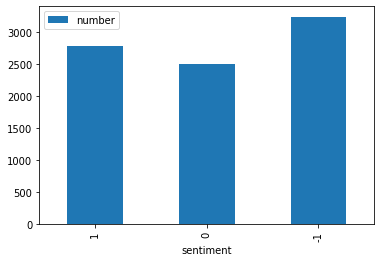

In [9]:
df_count.plot(x= 'sentiment', y= 'number', kind= 'bar')
plt.show()

In [15]:
lematizer = hazm.Lemmatizer()
normalizer = hazm.Normalizer()
corpus = []

In [23]:
for w in range(len(df['comment'])):
    msg = df['comment'][w]
    msg = normalizer.normalize(msg)
    msg = msg.split()
    msg = [lematizer.lemmatize(word) for word in msg if not word in stopwords_list()]
    msg = " ".join(msg)
    corpus.append(msg)

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
x = tf.fit_transform(corpus).toarray()
y = df['sentiment']

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [27]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(x_train, y_train)

In [28]:
y_pred = model.predict(x_test)

In [29]:
from sklearn.metrics import confusion_matrix
confusion_m = confusion_matrix(y_test, y_pred)
print(confusion_m)

[[557  32  58]
 [206 193 101]
 [143  36 377]]


In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
rec = recall_score(y_test, y_pred, average='micro')
prec = precision_score(y_test, y_pred, average='micro')

In [34]:
print("prec", prec, "\n")
print("rec", rec, "\n")

prec 0.6617733411626542 

rec 0.6617733411626542 

